## C-M Interaction Curves for W Shapes
Plot a $C/C_y$ vs $M/M_p$ interaction curve.

In [1]:
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg', 'pdf')
import pylab
import matplotlib.pyplot as plt

In [2]:
from Designer import sst
SST = sst.SST()

![Cross Sectional Forces](W-Shape.svg)

Calculate and return the compressive force, $C$ and the moment, $M$, corresponding to a
fully yielded cross-section with neutral axis a distance $Q$ below the centroid.
$0 \leq Q \leq D/2$

In [3]:
def calc(B,T,W,D,Q,Fy=350.):
    assert Q >= 0.
    assert Q <= D/2.
    H = D - 2.*T
    C = B*T*Fy          # top flange
    M = C*(H/2.+T/2.)
    if Q <= H/2.:
        f2 = Fy*W*H/2.  # web above centroid
        C += f2
        M += f2*H/4.
        f3 = Fy*W*Q     # web below centroid in compression
        C += f3
        M += -f3*Q/2.
        f4 = Fy*(H/2.-Q)*W # tension in web below centroid
        C -= f4
        M += f4*(Q+(H/2.-Q)/2.)
        f5 = Fy*B*T      # bot flange in tension
        C -= f5
        M += f5*(H/2.+T/2.)
    else:
        f2 = Fy*W*H     # total web in compression
        C += f2
        f3 = Fy*(Q-H/2.)*B  # part of flange in compression
        C += f3
        M -= f3*(H/2.+(Q-H/2.)/2.)
        f4 = Fy*(D/2.-Q)*B  # part of flange in tension
        C -= f4
        M += f4*(D/2. - (D/2.-Q)/2.)
    return C,M

In [4]:
B,T,W,D,A,Zx = SST.section('W250x73',properties='B,T,W,D,A,Zx')
B,T,W,D

(254.0, 14.199999999999999, 8.5999999999999996, 253.0)

Calculate $C_y$ when N.A. is at bottom fibre, and $M_p$ when N.A. is at centroid:

In [5]:
Cy = calc(B,T,W,D,Q=D/2.)[0]
Cy

3200806.0

In [6]:
Mp = calc(B,T,W,D,Q=0.)[1]
Mp

339416326.89999998

Now check using $C_y$ and $M_p$ calculated from tabulated properties:

In [7]:
Cyr,Mpr = 350.*A,350.*Zx
Cyr,Mpr

(3248000.0, 344750000.0)

Percent difference in each:

In [8]:
100*(Cy-Cyr)/Cyr,100*(Mp-Mpr)/Mpr

(-1.4530172413793103, -1.5471132994923926)

As differences are 1.5%, we'll put that down to fillets, and accept it.

Now vary $Q$ from 0 to $D/2$ and generate points to plot ($M/M_p$ and $C/C_r$):

In [9]:
cr = []
mr = []
for q in pylab.linspace(0.,D/2.):
    c,m = calc(B,T,W,D,Q=q)
    cr.append(c/Cy)
    mr.append(m/Mp)

Plot that interaction curve, with the accepted linear approximation:

$$
\frac{M}{M_r} = 1.18\left(1-\frac{C}{C_y}\right)
$$

(0, 1)

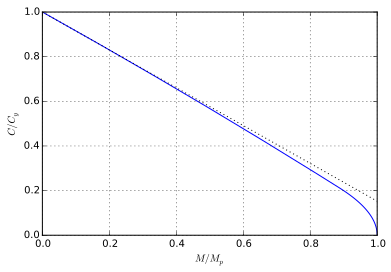

In [10]:
plt.plot(mr,cr,[0.,1.18],[1,0.],'k:')
plt.xlabel('$M/M_p$')
plt.ylabel('$C/C_y$')
plt.grid(True)
plt.xlim(0,1)

### Compare several different shapes

A function to compute the curve for one specific section:

In [11]:
def icplot(dsg):
    B,T,W,D = SST.section(dsg,properties='B,T,W,D')
    Cy = calc(B,T,W,D,Q=D/2.)[0]
    Mp = calc(B,T,W,D,Q=0.)[1]
    cr = []
    mr = []
    for q in pylab.linspace(0.,D/2.):
        c,m = calc(B,T,W,D,Q=q)
        cr.append(c/Cy)
        mr.append(m/Mp)
    plt.xlim(0,1)
    plt.ylim(0,1)
    return plt.plot(mr,cr)

Plot a few W shapes together, of radically different sizes:

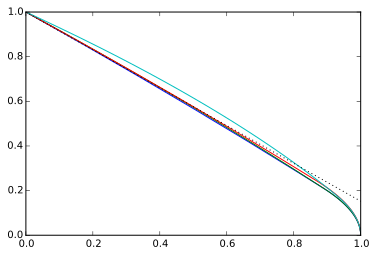

In [12]:
icplot('W250x73')+icplot('W200x71')+icplot('W150x30')+icplot('W360x1086')+plt.plot([0,1.18],[1,0],'k:')

We see there is not much difference.